In [19]:
# need file ../../../analysis.py
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent.parent))

import analysis

In [20]:
from copy import deepcopy

import matplotlib.pyplot as plt
import pandas as pd

PWD = Path.cwd()

In [21]:
df = pd.read_csv(
    f'{PWD}/LLM+Planning+Evaluation_8+October+2024_01.15.tsv',
    sep='\t',
    encoding='utf-16',
)

questions = pd.read_json('../surveys/final.jsonl', lines=True)

datasets = questions['dataset'].unique()
models = questions['model'].unique()
dataset_model_combinations = [(d, m) for d in datasets for m in models]

POINT_SCALE = 5


def t2i(
    text: str,
    point_scale: int = 5,
) -> int:
    if point_scale == 5:
        mapping = {
            'Strongly disagree': 1,
            'Somewhat disagree': 2,
            'Neither agree nor disagree': 3,
            'Somewhat agree': 4,
            'Strongly agree': 5,
        }
    elif point_scale == 3:
        mapping = {
            'Strongly disagree': 1,
            'Somewhat disagree': 1,
            'Neither agree nor disagree': 2,
            'Somewhat agree': 3,
            'Strongly agree': 3,
        }

    return mapping.get(text, None)


def i2t(
    integer: int,
    point_scale: int = 5,
) -> str:
    integer = int(integer)
    if point_scale == 5:
        mapping = {
            1: 'SD',
            2: 'sD',
            3: 'N',
            4: 'sA',
            5: 'SA',
        }
    elif point_scale == 3:
        mapping = {
            1: 'SD',
            2: 'N',
            3: 'SA',
        }

    return mapping.get(integer, None)

/var/folders/r7/t7qynv6j4fv_7r_q7qtk3kjw0000gn/T/ipykernel_95863/2340921146.py:1: DtypeWarning: Columns (4,5,6,9,10,11,12,13,14,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,179,180,181,182,183,184,185,186,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,2

In [22]:
datasets, models

(array(['Franklin', 'GSM8k', 'HotpotQA', 'StrategyQA'], dtype=object),
 array(['google/gemma-2-9b-it', 'meta-llama/Meta-Llama-3.1-8B-Instruct',
        'microsoft/Phi-3.5-mini-instruct', 'openai/gpt-4o-mini'],
       dtype=object))

In [23]:
questions.head()

,uuid,is_attention_check,dataset,model,question,parsed_response,html
0,36b1a3da-bc2b-4a9f-b0b5-31887af03c91,False,Franklin,google/gemma-2-9b-it,Which country will have the lower energy consu...,## Step-by-Step Plan:\n\n1. **Identify Data So...,<p><em>Which country will have the lower energ...
1,424e96e0-5051-426d-9d57-0ccc5fa352db,False,Franklin,google/gemma-2-9b-it,Which country in Northern Europe had the highe...,Here is the plan:\n\n1. **Define Northern Euro...,<p><em>Which country in Northern Europe had th...
2,c4b1e32f-1886-440a-9f9f-66a4d71eabdb,False,Franklin,google/gemma-2-9b-it,Which country in Eastern Asia had the highest ...,"## Plan:\n\n1. **Define ""Eastern Asia"":** Cons...",<p><em>Which country in Eastern Asia had the h...
3,b8d5fa16-e8fa-459c-93f7-3edc6b82b152,False,Franklin,google/gemma-2-9b-it,For the country in Micronesia that had the low...,## Plan:\n\n1. **Identify the country in Micro...,<p><em>For the country in Micronesia that had ...
4,5d5b6078-7e8e-4511-862b-3f2ecbccf019,False,Franklin,google/gemma-2-9b-it,Which country will have the higher life expect...,Here is the plan:\n\n1. **Identify reliable so...,<p><em>Which country will have the higher life...


In [24]:
# set column name to item in row 0
df.columns = df.iloc[0]
# set index to 'PROLIFIC_PID'
df = df.set_index('PROLIFIC_PID')
# save the 'original dataframe' to a new variable
original_columns = deepcopy(df)
# drop row 0
df = df.drop(df.index[0])

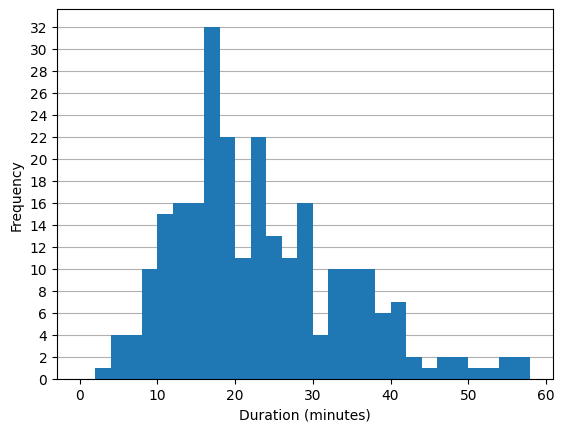

In [25]:
# get durations and remove outliers
durations = df['Duration (in seconds)'].astype(float).map(lambda x: x / 60)
# print a stonking histogram of durations with a specified bin width
fig, ax = plt.subplots()
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.hist(durations, bins=range(0, 60, 2))
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Frequency')
ax.set_yticks(range(0, 34, 2))
plt.show()

In [26]:
durations.describe()

count    257.000000
mean      23.973930
std       12.246549
min        3.650000
25%       15.533333
50%       21.300000
75%       29.983333
max       72.483333
Name: Duration (in seconds), dtype: float64

In [27]:
# get durations which are more than 3 standard deviations lower than the mean
outliers_time = durations.mean() - 3 * durations.std()
print(f'Minimum permissible time: {outliers_time} minutes')
outliers = durations[durations < outliers_time]
print(outliers)
# remove outliers
df = df[~df.index.isin(outliers.index)]

Minimum permissible time: -12.765717973771746 minutes
Series([], Name: Duration (in seconds), dtype: float64)


In [28]:
# find the uuid in the string using regex to match a 36 character string
df.columns = df.columns.str.extract(r'([a-f0-9]{8}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{12}_[1-4])')[0]
metadata = df[~df.index.str.contains(r'^[a-f0-9]{8}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{4}-[a-f0-9]{12}_[1-4]$')]
# only return columns where there is a match
df = df[df.columns.dropna()]
# drop columns with all NaN values
df = df.dropna(axis=1, how='all')

In [29]:
attention_checks_uuid = 'd67998d7-8f14-4f50-823b-cb63027f21d9'
attention_check_cols = [col for col in df.columns if col.startswith(attention_checks_uuid)]
df = df.drop(attention_check_cols, axis=1)
attention_check_somewhat_agree_uuid = 'd67998d7-8f14-4f50-823b-cb63027f21d9_4 - Where'
attention_check_strongly_disagree_uuid = 'd67998d7-8f14-4f50-823b-cb63027f21d9_3 - Could'
# get columns in original df which start with either of the two attention check uuids
valid_columns = original_columns.columns[
    original_columns.columns.str.startswith(attention_check_somewhat_agree_uuid)
    | original_columns.columns.str.startswith(attention_check_strongly_disagree_uuid)
]
# get the attention check columns
attention_check_df = original_columns[valid_columns]
# drop row 0
attention_check_df = attention_check_df.drop(attention_check_df.index[0])
# rename columns
attention_check_df.columns = ['Somewhat agree', 'Strongly disagree']
# get rows where either attention check failed
single_failed_check = attention_check_df[
    (attention_check_df['Somewhat agree'] != 'Somewhat agree')
    | (attention_check_df['Strongly disagree'] != 'Strongly disagree')
]
# get rows where both attention checks failed
double_failed_check = attention_check_df[
    (attention_check_df['Somewhat agree'] != 'Somewhat agree')
    & (attention_check_df['Strongly disagree'] != 'Strongly disagree')
]
# drop rows from single failed check if they are in double failed check
single_failed_check = single_failed_check[~single_failed_check.index.isin(double_failed_check.index)]
print(
    f'Number of participants who failed one attention check: {len(single_failed_check)} ({len(single_failed_check) / len(df) * 100:.2f}%)'
)
print(
    f'Number of participants who failed both attention checks: {len(double_failed_check)} ({len(double_failed_check) / len(df) * 100:.2f}%)'
)
print(f'Failed double checks: {double_failed_check.index}')
double_failed_check

Number of participants who failed one attention check: 23 (8.95%)
Number of participants who failed both attention checks: 8 (3.11%)
Failed double checks: Index(['666362028ebee6f125f05a4d', '646bd812bf93129feeb5a3dc',
       '66a7af39796ea115d89dca18', '66ec81721f2225330a854ae1',
       '6654b7668e8642303bbc2fa7', '668947f0d94a100faf641b3d',
       '66b3d51a3d747d6e2bdcd9f8', '5c50efd2cc71f4000125ce0d'],
      dtype='object', name='PROLIFIC_PID')


,Somewhat agree,Strongly disagree
PROLIFIC_PID,,
666362028ebee6f125f05a4d,Strongly disagree,Somewhat agree
646bd812bf93129feeb5a3dc,Somewhat disagree,Somewhat disagree
66a7af39796ea115d89dca18,Strongly agree,Somewhat agree
66ec81721f2225330a854ae1,Strongly agree,Somewhat disagree
6654b7668e8642303bbc2fa7,Strongly disagree,Somewhat agree
668947f0d94a100faf641b3d,Neither agree nor disagree,Neither agree nor disagree
66b3d51a3d747d6e2bdcd9f8,Neither agree nor disagree,Somewhat agree
5c50efd2cc71f4000125ce0d,Strongly agree,Strongly agree


In [30]:
"""
Split main dataframe into 3 dataframes for each variation of the question.
Split also by dataset and model.
"""
df = df.map(t2i)
# get uuids in survey
uuids_in_survey = {i.split('_')[0] for i in df.columns}
# get questions where questions['uuid'] is in uuids_in_survey
questions = questions[questions['uuid'].isin(uuids_in_survey)]
# # many-to-one mapping between ('model', 'dataset') and 'uuid'. get uuids for each ('model', 'dataset') pair
grouped_uuids = questions.groupby(['dataset', 'model'])['uuid'].apply(list).to_dict()
# # each uuid contains 3 variations with suffixes _1, _2, _3. create separate dataframes for each variation
Q1, Q2, Q3, Q4 = {}, {}, {}, {}
for (dataset, model), uuids in grouped_uuids.items():
    Q1[(dataset, model)] = df[[f'{uuid}_1' for uuid in uuids]].apply(pd.to_numeric)
    Q2[(dataset, model)] = df[[f'{uuid}_2' for uuid in uuids]].apply(pd.to_numeric)
    Q3[(dataset, model)] = df[[f'{uuid}_3' for uuid in uuids]].apply(pd.to_numeric)
    Q4[(dataset, model)] = df[[f'{uuid}_4' for uuid in uuids]].apply(pd.to_numeric)

Q1[('Franklin', 'openai/gpt-4o-mini')].head()

,0869444c-aa4b-492a-8a13-985f6d6720b5_1,d72fa515-c0f1-41ae-a792-a96409c69308_1,0376540a-e2f3-4245-8f06-2ac14a692010_1,cdf1283c-f705-45c4-af93-3cd42956dec6_1,5eeb2ad1-df04-4feb-b414-9746cc99f78c_1,0be5ff45-2379-4bfd-81ee-7d2eb41ae7a1_1,e1681ec9-220e-401a-b534-920319d8d157_1,43dd9c34-ef32-4a0f-85f0-8e07ad354dd0_1,65762c75-e21d-49dd-bbbb-77a368b1b5d2_1,32b1f7dc-db5a-404f-babd-b0b93b77eabb_1,...,05421006-2567-4b5a-b278-707508b7437b_1,3dd60711-96de-4923-a71b-edce7031651b_1,26c6302a-481f-4a76-96d9-68ad30a9ca58_1,c8a7f9ce-ff34-4264-922c-88103360c995_1,191ffea9-0384-488e-bdbf-6df846059869_1,27717108-e566-4026-b387-b2e0bdbde84b_1,950b7187-5588-4b0f-a1e1-cdacd1ba3150_1,2fea27be-9ba3-45b2-8288-1213039568be_1,7b419f29-8cc7-4c1d-8bd9-c273b4dd1182_1,58bb25a0-f690-41e9-a781-a92f315d9da4_1
PROLIFIC_PID,,,,,,,,,,,,,,,,,,,,,
5ebd30bca8d08203a6e2334f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66f88d8c5fa10159db0db5c8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5f4cbdf9f599118d27c21442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669129db4e9424079e8fb66b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6648c2b185cc799f4856c1b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
analysis.compute_average_sem(Q1)

,dataset,model,mean,std,mean sem
0,Franklin,google/gemma-2-9b-it,4.45,0.63,0.31
1,Franklin,meta-llama/Meta-Llama-3.1-8B-Instruct,4.53,0.67,0.33
2,Franklin,microsoft/Phi-3.5-mini-instruct,4.43,0.73,0.36
3,Franklin,openai/gpt-4o-mini,3.92,1.15,0.58
4,GSM8k,google/gemma-2-9b-it,4.26,0.85,0.42
5,GSM8k,meta-llama/Meta-Llama-3.1-8B-Instruct,4.62,0.53,0.26
6,GSM8k,microsoft/Phi-3.5-mini-instruct,4.57,0.61,0.31
7,GSM8k,openai/gpt-4o-mini,4.47,0.74,0.37
8,HotpotQA,google/gemma-2-9b-it,4.08,0.92,0.46
9,HotpotQA,meta-llama/Meta-Llama-3.1-8B-Instruct,4.36,0.71,0.35


['Franklin', 'GSM8k', 'HotpotQA', 'StrategyQA']
['google/gemma-2-9b-it', 'meta-llama/Meta-Llama-3.1-8B-Instruct', 'microsoft/Phi-3.5-mini-instruct', 'openai/gpt-4o-mini']


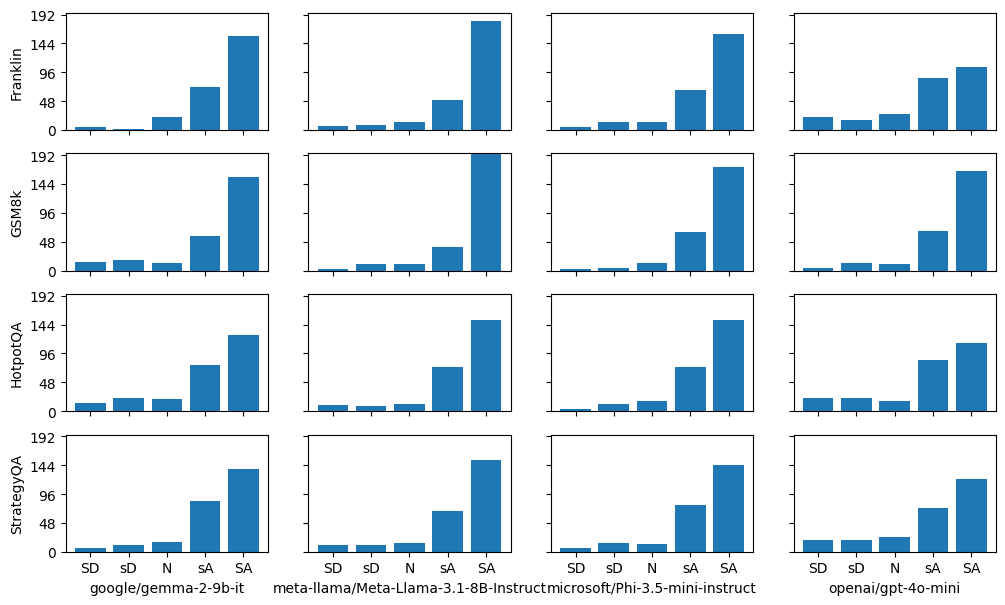

In [35]:
analysis.plot_histograms(Q1)

How many rate the plans as sensible and rational?

In [36]:
analysis.counts_gt_n(Q1, 3)

,dataset,model,counts_greater_than_3
0,Franklin,google/gemma-2-9b-it,0.89
1,Franklin,meta-llama/Meta-Llama-3.1-8B-Instruct,0.89
2,Franklin,microsoft/Phi-3.5-mini-instruct,0.88
3,Franklin,openai/gpt-4o-mini,0.75
4,GSM8k,google/gemma-2-9b-it,0.83
5,GSM8k,meta-llama/Meta-Llama-3.1-8B-Instruct,0.91
6,GSM8k,microsoft/Phi-3.5-mini-instruct,0.92
7,GSM8k,openai/gpt-4o-mini,0.90
8,HotpotQA,google/gemma-2-9b-it,0.79
9,HotpotQA,meta-llama/Meta-Llama-3.1-8B-Instruct,0.88
